In [1]:
from modules.client import OffVarianceClient
import modules.utils as utils
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

C:\Users\user\offvariance\notebooks\modules\utils.py:332: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['exp_g_03_H_cop'] = df['team1_all_xgpower-03_cop_xg90noindex'] * df['team2_all_xgpower-03_com_xga90index']
C:\Users\user\offvariance\notebooks\modules\utils.py:333: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['exp_g_03_A_cop'] = df['team2_all_xgpower-03_cop_xg90noindex'] * df['team1_all_xgpower-03_com_xga90index']
C:\Users\user\offvariance\notebooks\modules\utils.py:334: PerformanceWarning: DataFrame is highly fragment

In [2]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win2'] >= 1.8) & (games_df['odds_open_win2'] <= 2.7) &
(games_df['odds_open_tb25'] >= 1.6) & (games_df['odds_open_tb25'] <= 2)
]

Count: 213
Open profit: -6.457000000000004
Close profit: -7.190000000000001
Open ROI: -0.030314553990610348
Close ROI: -0.03375586854460094
UDI: 0.004069604492205101
AxesSubplot(0.125,0.125;0.775x0.755)


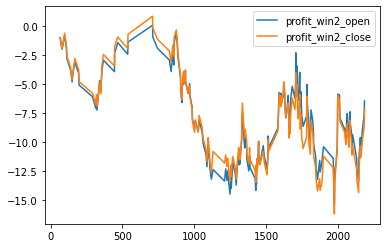

In [3]:
utils.print_away_win_result(segmented_df)

In [4]:
utils.analyze_correlation(segmented_df, 'difference', utils.metrics)

,correlation
exp_g_03_A_loc,-0.172967
exp_total_03_loc,-0.165380
paper_total_03_loc,-0.161524
exp_total_loc,-0.145942
sum_ufr_03_loc,-0.145290
...,...
exp_g_diff_H_A_loc_cop,0.001879
exp_g_diff_A_H_loc_cop,-0.001879
paper_H,-0.001827
exp_g_diff_03_A_H_loc_cop,-0.000885


In [5]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_win2')

,low,high,diff
exp_g_diff_H_A_loc_cop,0.267648,-1.276580,1.544228
exp_g_diff_A_H_loc_cop,-0.267648,1.276580,1.544228
exp_g_total_loc_com,2.842746,3.921357,1.078611
exp_g_A_loc_cop,1.176470,2.246443,1.069973
exp_g_diff_H_A_com,0.056783,-0.915351,0.972134
...,...,...,...
exp_g_total_03_draw,1.768698,1.754712,0.013986
exp_g_diff_H_A_loc_zero,-0.347986,-0.360790,0.012804
exp_g_diff_A_H_loc_zero,0.347986,0.360790,0.012804
exp_g_03_A_zero,0.955300,0.964227,0.008927


In [6]:
updated_segmented_df = segmented_df.loc[
(segmented_df['exp_g_03_A_loc'] >= 1.29) & (segmented_df['paper_total_03_loc'] >= 2.14)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'exp_g_03_A_loc',
    'paper_total_03_loc',
], 'udi_win2')

,low,high,diff
exp_g_03_A_loc,1.503431,1.740818,0.237386
paper_total_03_loc,2.378677,2.563056,0.184379


Count: 6
Open profit: 4.16
Close profit: 3.6000000000000005
Open ROI: 0.6933333333333334
Close ROI: 0.6000000000000001
UDI: 0.07938115086306817
AxesSubplot(0.125,0.125;0.775x0.755)


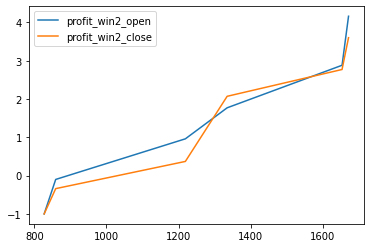

In [7]:
filtered_result_df = segmented_df.loc[
(segmented_df['exp_g_03_A_loc'] >= 1.74) & (segmented_df['paper_total_03_loc'] >= 2.56)
]
utils.print_away_win_result(filtered_result_df)